# In this notebook we train and evaluate our models

In [2]:
import pandas as pd 
import numpy as np
import random 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

random.seed(42) #in case we will use random somewhere

data = pd.read_csv("../data/processed/processed_credit_risk_dataset.csv")

## Split test and train data



In [3]:
y = data['loan_status'].to_numpy()
X = data.drop('loan_status',axis = 1).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state= 42) #stratify to handle imbalance in target lables

## Define metrics and scoring

In [4]:
def score_model(model, X_test, y_test):
    
    """ 
    Parameters: 
         X_test (numpy array)
         y_test (numpy array)
         model: fitted model
    """

    y_pred = model.predict(X_test)
    metrics = precision_recall_fscore_support(y_test, y_pred, pos_label=1, average='binary')
    
    print('Confusion matrix)\n', confusion_matrix(y_test, y_pred))
    print('Precision is {:0.2f} %'.format(metrics[0]*100))
    print('Recall is {:0.2f} %'.format(metrics[1]*100))
    print('Fscore is {:0.2f} %'.format(metrics[2]*100))


## Models

### Decision Tree Classifier

In [5]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

model_DTC =  DecisionTreeClassifier(max_depth = 10, random_state = 42) #define model parameters
model_DTC.fit(X_train, y_train) #fit model

score_model(model_DTC,X_test,y_test) 


Confusion matrix)
 [[6311   58]
 [ 465 1312]]
Precision is 95.77 %
Recall is 73.83 %
Fscore is 83.38 %


### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(random_state = 42)
model_LR.fit(X_train, y_train)
score_model(model_LR,X_test,y_test)

Confusion matrix)
 [[6102  267]
 [1272  505]]
Precision is 65.41 %
Recall is 28.42 %
Fscore is 39.62 %


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Logistic Regression with increased max_iter and scaled data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline.fit(X_train, y_train)
score_model(pipeline, X_test, y_test)

Confusion matrix)
 [[6068  301]
 [ 815  962]]
Precision is 76.17 %
Recall is 54.14 %
Fscore is 63.29 %


### KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
score_model(model_KNN,X_test,y_test)

Confusion matrix)
 [[5966  403]
 [1288  489]]
Precision is 54.82 %
Recall is 27.52 %
Fscore is 36.64 %


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)
score_model(model_RF,X_test,y_test)

Confusion matrix)
 [[6338   31]
 [ 463 1314]]
Precision is 97.70 %
Recall is 73.94 %
Fscore is 84.18 %


### Summary

Precision:

- Random Forest: 97.70%
- Decision Tree: 95.77%
- Logistic Regression with increased iterations: 76.17 %
- Logistic Regression: 65.41%
- KNN: 54.82%

Random Forest model has the highest precision, but Decision Tree is very close

Recall:

- Random Forest: 73.94%
- Decision Tree: 73.83%
- Logistic Regression with increased iterations: 54.14 %
- Logistic Regression: 28.42%
- KNN: 27.52%

Random Forest model also has the highest recall, meaning it has the lowest false negative rate.

F1-Score:

- Random Forest: 84.18%
- Decision Tree: 83.38%
- Logistic Regression with increased iterations: 63.29 %
- Logistic Regression: 39.62%
- KNN: 36.64%

### Conclusion

- Random Forest has the highest precision, recall, and F1-Score, making it the best performer for this dataset
- Decision Tree is a close second but has slightly lower precision and F1-score compared to Random Forest
- Logistic Regression and KNN perform significantly worse in comparison to the tree-based models
- Since the Random Forest model shows the best performance, it should be the primary model used for predicting loan defaults
- Even though Random Forest performs well, further hyperparameter tuning might improve its performance even more
- Increasing maximum number of iteration in Logistic Regression can help with convergence issues but may increase computational time.



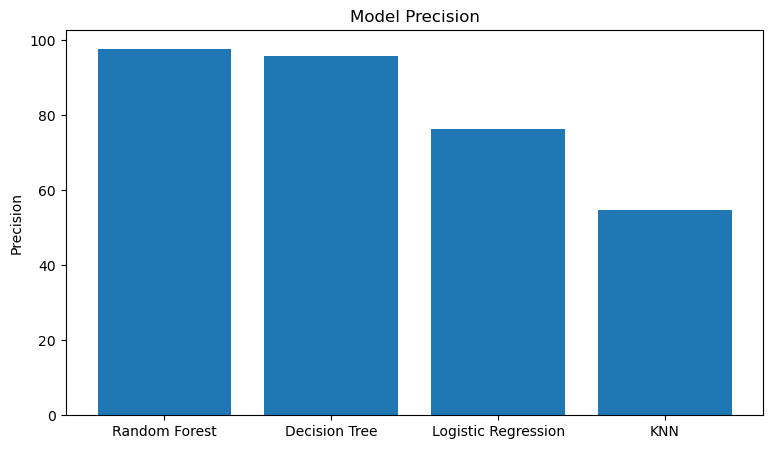

In [8]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'KNN']
precision = [97.70, 95.77, 76.17, 54.82]
recall = [73.94, 73.83, 54.14, 27.52]
f1_score = [84.18, 83.38, 63.29, 36.64]

# Precision:

plt.figure(figsize=(9,5))
plt.bar(models, precision)
plt.ylabel('Precision')
plt.title('Model Precision')
plt.show()


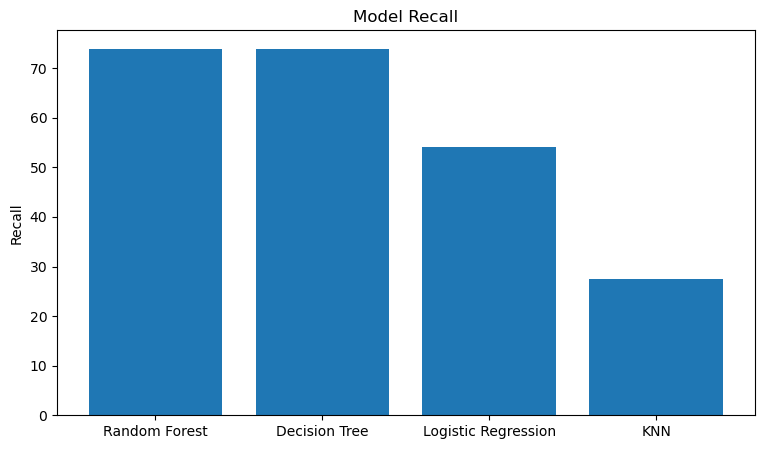

In [9]:
# Recall:

plt.figure(figsize=(9,5))
plt.bar(models, recall)
plt.ylabel('Recall')
plt.title('Model Recall')
plt.show()


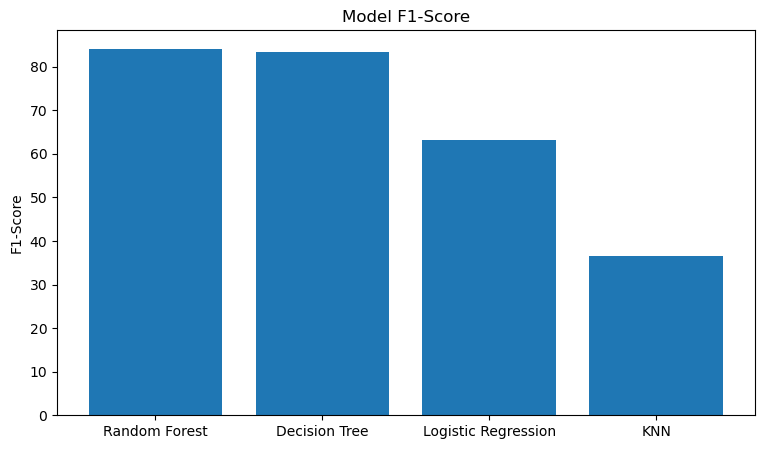

In [10]:
# F1-Score:

plt.figure(figsize=(9,5))
plt.bar(models, f1_score)
plt.ylabel('F1-Score')
plt.title('Model F1-Score')
plt.show()
